## Exploratory data analysis for McDonalds Nutrition Menu from Kaggle
#### Magic SQL Seaborn and Matplotlib

<font color=blue> Let us first load the SQL extension and establish a connection with the database </font>

In [26]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [27]:
%sql ibm_db_sa://lqq31954:zjsr%40mdcnlp4jskc@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB

'Connected: lqq31954@BLUDB'

<font color=blue> Store the dataset in a Table </font>


In [47]:
import pandas
mcdonalds_nutrition_data = pandas.read_csv("/resources/data/mcdonaldsmenu.csv")
%sql PERSIST mcdonalds_nutrition_data

<font color=blue> Count the no. of rows in data set </font>

In [5]:
%sql SELECT count(*) FROM mcdonalds_nutrition_data;

 * ibm_db_sa://lqq31954:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


1
260


<font color=blue> Get the data into a data frame and also import seaborn, matplotlib and pandas library
Count the no. of rows in data set </font>

In [7]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

data_mcdonalds = %sql SELECT * FROM mcdonalds_nutrition_data;
df_mcdonalds = data_mcdonalds.DataFrame()
df_mcdonalds.head()

 * ibm_db_sa://lqq31954:***@dashdb-txn-sbox-yp-dal09-12.services.dal.bluemix.net:50000/BLUDB
Done.


,index,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,...,31,10,4,17,3,17,10,0,25,15
1,1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,...,30,10,4,17,3,18,6,0,25,8
2,2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,...,29,10,4,17,2,14,8,0,25,10
3,3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,...,30,10,4,17,2,21,15,0,30,15
4,4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,...,30,10,4,17,2,21,6,0,25,10


<font color=blue> Learn basic statistic details about your data using the describe() pandas function </font>

In [18]:
df_mcdonalds.describe(include='all')

,index,Category,Item,Serving Size,Calories,Calories from Fat,Tot Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,NaN,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Coffee & Tea,McFlurry with M&M’s Candies (Snack),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,129.500000,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,75.199734,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,64.750000,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,129.500000,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,194.250000,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


<font color=green> Observations on data
We see that there are 
260 observations of food items in our data frame. 
9 unique categories of food items in our data frame. 
summary statistics information such as frequency, mean, median, standard deviation, etc
Outlier:
For example, the maximum value for total fat is 118. Lets investigate further </font>

## Plot Numerical Distributions 
<font color=blue> A quick and dirty grid of histograms is enough to understand the distributions. First let us get all column headers </font>

In [22]:
df_mcdonalds.rename(columns={'Total Fat': 'TotalFat' }, inplace=True)
list (df_mcdonalds.columns)

['index',
 'Category',
 'Item',
 'Serving Size',
 'Calories',
 'Calories from Fat',
 'Tot Fat',
 'Total Fat (% Daily Value)',
 'Saturated Fat',
 'Saturated Fat (% Daily Value)',
 'Trans Fat',
 'Cholesterol',
 'Cholesterol (% Daily Value)',
 'Sodium',
 'Sodium (% Daily Value)',
 'Carbohydrates',
 'Carbohydrates (% Daily Value)',
 'Dietary Fiber',
 'Dietary Fiber (% Daily Value)',
 'Sugars',
 'Protein',
 'Vitamin A (% Daily Value)',
 'Vitamin C (% Daily Value)',
 'Calcium (% Daily Value)',
 'Iron (% Daily Value)']

<font color=blue> We will plot the histograms for Sodium, Carbohydrates, Sugars, Protein. </font>


<AxesSubplot:xlabel='Sodium'>

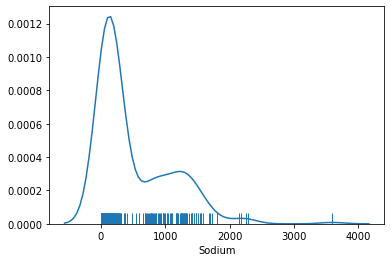

In [40]:
# Plot the distribution with a kernel density estimate and rug plot
sns.distplot(df_mcdonalds.Sodium, rug=True, hist=False)


<AxesSubplot:xlabel='Carbohydrates'>

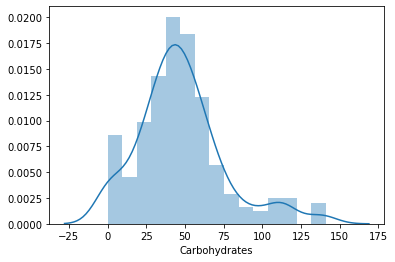

In [41]:
# Show a default plot with a kernel density estimate and histogram with bin size 
#determined automatically with a reference rule:
sns.distplot(df_mcdonalds.Carbohydrates)


<AxesSubplot:ylabel='Sugars'>

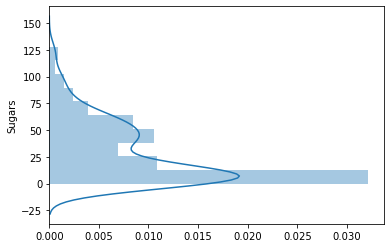

In [42]:
# Plot the distribution on the vertical axis:
sns.distplot(df_mcdonalds.Sugars, vertical=True)

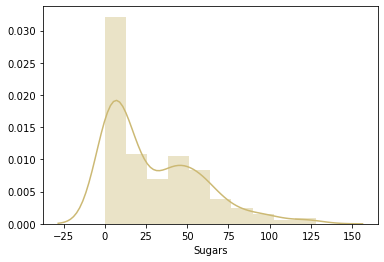

In [43]:
# CHange color of the plot
sns.set_color_codes()
ax = sns.distplot(df_mcdonalds.Sugars, color="y")

## Scatter Plot or swarm plot
<font color=blue> To find food with high nutrients content let us make a categorical scatter plot. Group the swarms by a categorical variable. </font>

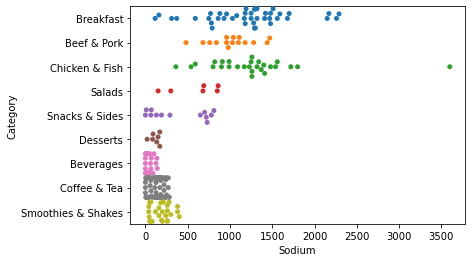

In [55]:
plot = sns.swarmplot(x="Sodium", y="Category", data = df_mcdonalds )


<font color=green> Observations:
We see in category Chicken n Fish, one food item has very high sodium content, let us find the name and serving size of food item </font>


In [70]:
print('Highest Sodium content of', df_mcdonalds['Sodium'].max(), 'in food')
index = df_mcdonalds['Sodium'].idxmax()
df_mcdonalds.loc[index,'Item':'Serving Size']

Highest Sodium content of 3600 in food


Item            Chicken McNuggets (40 piece)
Serving Size                 22.8 oz (646 g)
Name: 82, dtype: object

<font color=green> We see in category Chicken and Fish Chicken McNuggets (40 piece) has the highest sodium content of 3600 </font>

### Co-relation plots
<font color=blue> Correlation is a value between -1 and 1 that represents how closely two features are associated. Positive correlation means that as one feature increases, the other increases. Negative correlation means that as one feature increases, the other decreases.
Strong Relation - values near -1 or 1
Weak Relation - values near 0
No Relation - 0 </font>

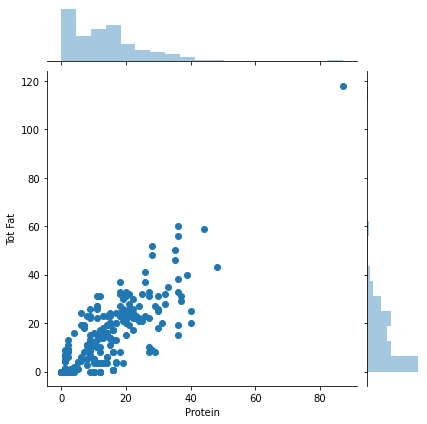

In [72]:
plot = sns.jointplot(x="Protein", y="Tot Fat", data = df_mcdonalds )

<font color=green> Observations: We see that the points on the scatter plot are closer to a straight line in the positive direction. So we have a positive correlation between protein and fat in the foods.We see one outlier </font>

### Corelation heatmaps
<font color=blue> Let us limit ourselves to macro-nutrients </font>


<AxesSubplot:>

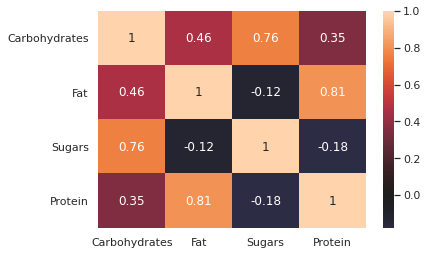

In [113]:
df_mcdonalds.rename(columns={'Tot Fat': 'Fat' }, inplace=True)
macro_df = df_mcdonalds[["Category","Carbohydrates","Fat","Sugars","Protein"]]
corr = macro_df.corr()
sns.heatmap(corr, annot=True, center=0)

<font color=green> Observations: we have a positive correlation between protein and fat and the value is 0.81
we have a negative correlation between protein and sugars and the value is -0.18 </font>

## Plot Segmentations with Box Plots Segmentations 
A box plot shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable.They are powerful ways to observe the relationship between categorical features and numeric features. </font>



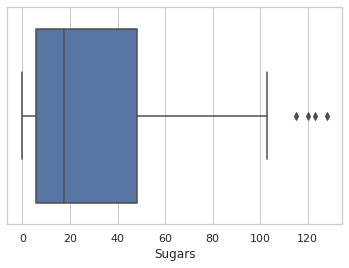

In [76]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Sugars"])


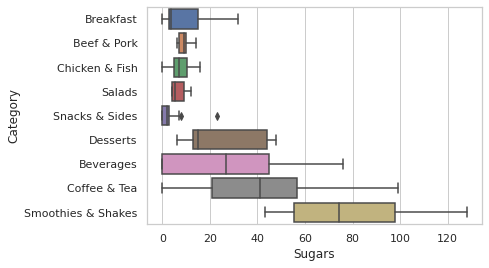

In [111]:
ax = sns.boxplot(x="Sugars", y="Category", data = df_mcdonalds)

<font color=green> We see that the median line (middle vertical bar in the box) for Beverages and Coffe n Tea is Higher than in other Food items esp Smoothies and Shakes </font>